### <center>Program 5: PCA (Principal Component Analysis)</center>

#### Use the ‘Wine’ dataset from sklearn and perform the following:

#### Apply PCA technique and decide upon the number of principal components. Comment on the strategy adopted for the decision.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [55]:
# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Create a DataFrame for inspection (optional)
df_wine = pd.DataFrame(X, columns=wine.feature_names)
df_wine['target'] = y
print("Dataset shape:", df_wine.shape)
df_wine.head()

Dataset shape: (178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


#### Basic Info of the dataset

In [56]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

#### Checking for null values in the dataset

In [57]:
df_wine.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

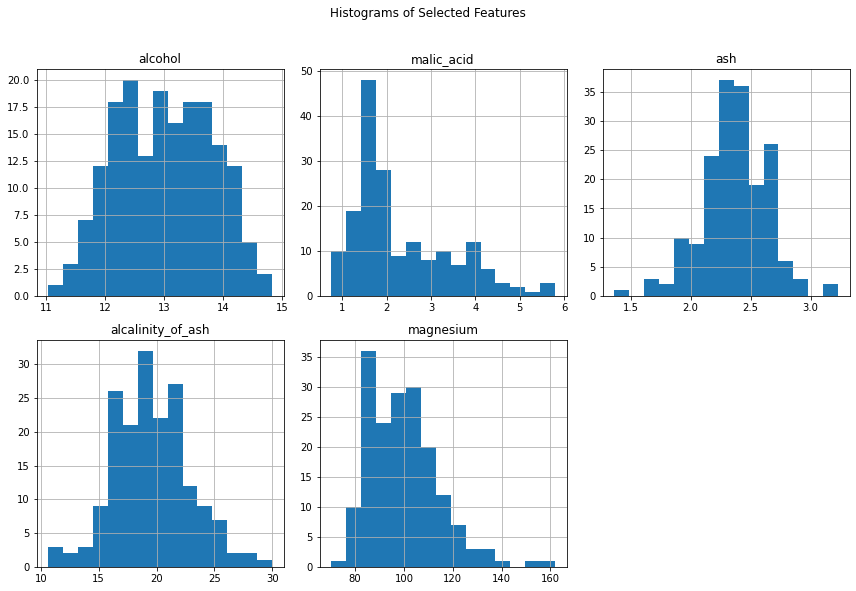

In [58]:
# Distribution plots for a few features
features_to_plot = wine.feature_names[:5]  # Plotting the first 5 features as an example
df_wine[features_to_plot].hist(bins=15, figsize=(12, 8), layout=(2, 3))
plt.suptitle('Histograms of Selected Features', y=1.02)
plt.tight_layout()
plt.show()

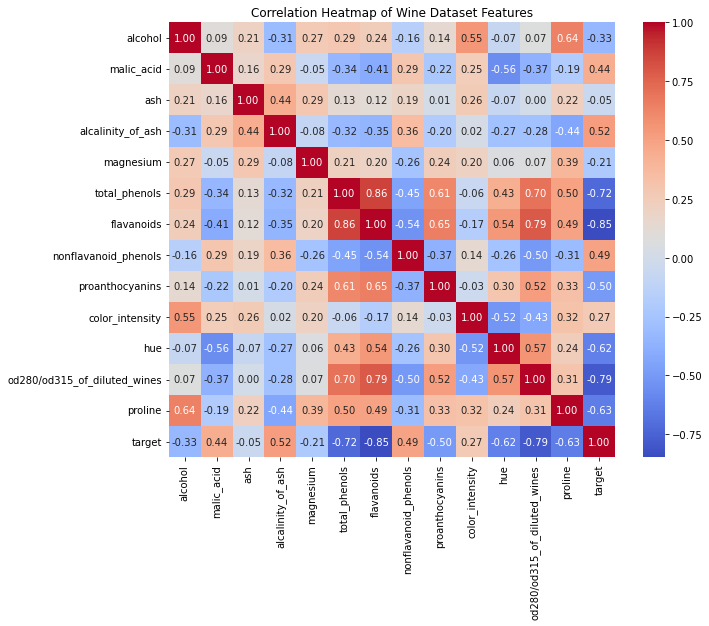

In [59]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_wine.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Wine Dataset Features')
plt.show()

In [60]:
# Split the original dataset (without PCA)
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=50)

In [61]:
# Train Logistic Regression on original data
model_original = LogisticRegression(max_iter=1000, random_state=50)
model_original.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=50)

In [62]:
# Evaluate accuracy
accuracy_original = model_original.score(X_test, y_test)
print("Accuracy (Without PCA):", round(accuracy_original, 4))

Accuracy (Without PCA): 0.963


#### PCA is sensitive to the scale of the features. We standardize the dataset so that each feature contributes equally to the analysis.

In [39]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

####  PCA Analysis
#### We perform PCA to determine how many principal components are needed to capture at least 95% of the variance.
#### The steps include:
* Applying PCA.
* Plotting the cumulative explained variance.
* Deciding on the number of components (`k`) where cumulative variance exceeds 95%.

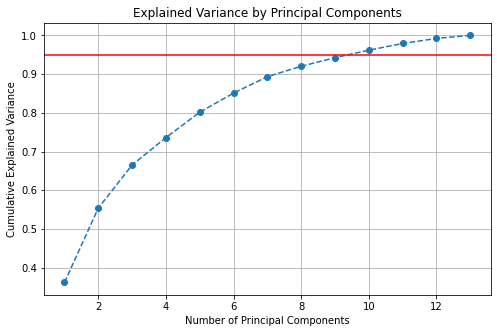

Optimal number of principal components: 10


In [63]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.grid()
plt.show()

# Determine the number of components based on 95% variance threshold
num_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f'Optimal number of principal components: {num_components}')

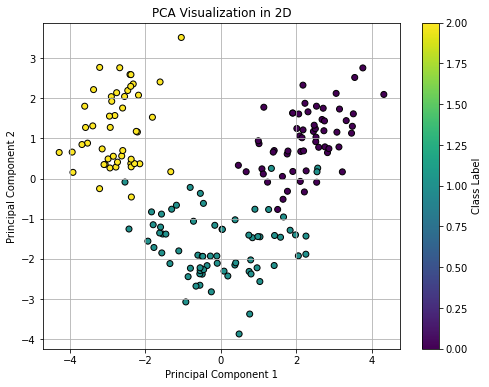

In [43]:
# Visualizing PCA-transformed data in 2D
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization in 2D')
plt.colorbar(label='Class Label')
plt.grid()
plt.show()

#### Observations
- The 2D PCA plot shows three distinct clusters corresponding to the three target classes (labeled **0**, **1**, and **2**).
- The classes appear well-separated along the two principal components, indicating that these components capture meaningful structure in the data.
- Class “0” (teal points) is largely clustered toward the left/bottom side, class “1” (yellow points) is clustered toward the left/top side, and class “2” (purple points) is clustered toward the right side.

#### Inference
- Even though the original dataset has higher dimensionality, **just two principal components** are sufficient to visually separate the three classes quite effectively.
- This suggests that the **first two principal components** capture a significant portion of the variance relevant to class distinctions.
- PCA thus provides a convenient **low-dimensional view** of the data, aiding in identifying patterns and cluster structures that might otherwise be less apparent in the original high-dimensional space.


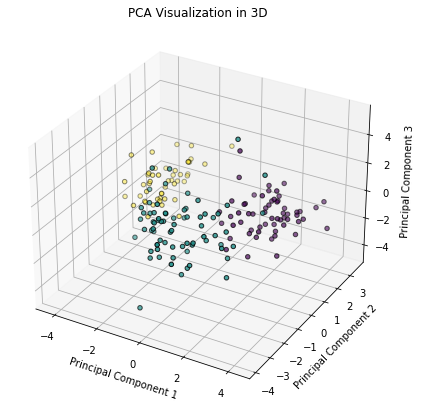

In [44]:
# Visualizing PCA-transformed data in 3D
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y, cmap='viridis', edgecolors='k')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Visualization in 3D')
plt.show()

#### Observations
- The 3D PCA plot shows that the **three classes** (labeled 0, 1, and 2) form relatively distinct clusters in the space of the first three principal components.
- Class **0** (teal) occupies a region primarily toward the negative side of PC 1, while Class **1** (yellow) clusters more toward the center/top, and Class **2** (purple) is predominantly on the positive side of PC 1.
- The clear separation among the clusters indicates that these principal components effectively capture the variance that distinguishes the wine classes.

#### Inference
- **Reducing the dataset** to three principal components still **retains enough information** to visually separate the classes, suggesting strong underlying structure in the data.
- The 3D PCA representation confirms that the **Wine dataset** is inherently well-separated, implying that a variety of classification algorithms could achieve high accuracy.
- This also underscores the utility of **PCA** as a tool for both **visualization** and **dimension reduction**, enabling easier inspection of how classes differ in a lower-dimensional space.


#### Build Logistic Regression model on the original dataset and PCA transformed data. Compare the performance of both the models.

### Logistic Regression Modeling
#### We build two logistic regression models:
#### 1. **Original Data Model:** On the standardized original dataset.
#### 2. **PCA-Transformed Data Model:** On the dataset transformed using PCA with `k` components.
#### We then compare the performance of these models.

#### 1. **Original Data Model:** On the standardized original dataset.

In [45]:
# Split the standardized original data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train Logistic Regression model on original data
lr_original = LogisticRegression(max_iter=1000, solver='liblinear')
lr_original.fit(X_train, y_train)
y_pred_original = lr_original.predict(X_test)

# Evaluate the model on the original data
acc_original = accuracy_score(y_test, y_pred_original)
print("Accuracy on Original Data: {:.2f}%".format(acc_original * 100))
print("\nClassification Report (Original Data):\n", classification_report(y_test, y_pred_original))

Accuracy on Original Data: 98.15%

Classification Report (Original Data):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



#### 2. **PCA-Transformed Data Model:** On the dataset transformed using PCA with `10` components.

In [47]:
k=10

# Apply PCA with k components (as decided earlier)
pca_k = PCA(n_components=k)
X_pca = pca_k.fit_transform(X_scaled)

# Split the PCA-transformed data (using the same target y)
X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.3, random_state=42, stratify=y)

# Build Logistic Regression model on PCA-transformed data
lr_pca = LogisticRegression(max_iter=10000, random_state=42)
lr_pca.fit(X_train_pca, y_train)
y_pred_pca = lr_pca.predict(X_test_pca)

# Evaluate the model on PCA-transformed data
acc_pca = accuracy_score(y_test, y_pred_pca)
print("Accuracy on PCA-transformed Data (using {} components): {:.2f}%".format(k, acc_pca * 100))
print("\nClassification Report (PCA Data):\n", classification_report(y_test, y_pred_pca))

Accuracy on PCA-transformed Data (using 10 components): 98.15%

Classification Report (PCA Data):
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        18
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



#### Observations
- The original Wine dataset consists of 178 instances and 14 columns (13 features plus the target).
- PCA analysis revealed that **10 principal components** are sufficient to retain approximately 95% of the total variance.
- A Logistic Regression model built on the original standardized data achieved an accuracy of **98.15%**.
- Similarly, a model built on the PCA-transformed data (using the top 10 components) also achieved an accuracy of **98.15%**.
- The classification reports for both models are nearly identical, indicating that the PCA transformation has preserved the critical discriminative information.

#### Conclusion
- The PCA transformation effectively reduced the dimensionality of the dataset from 13 features to 10 principal components while retaining nearly all (95%) of the information.
- Since both models yield identical performance metrics, it confirms that the top 10 principal components capture the essential characteristics of the data required for accurate classification.
- Thus, applying PCA in this case simplifies the dataset without sacrificing model performance, providing a useful strategy for reducing complexity and potential overfitting.
